# IMPORT LIBRARY

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# delete outlier
from sklearn.neighbors import LocalOutlierFactor

In [53]:
# https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data?datasetId=721951&sortBy=voteCount&sort=votes

# IMPORT DATASET

In [54]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [55]:
df = pd.read_csv("/content/gdrive/MyDrive/kaggle/unsupervised_learning_on_country_data/dataset/Country-data.csv")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


# PRE-PROCESSING

In [56]:
# watch count of country column
df['country'].value_counts()

Afghanistan    1
Morocco        1
Myanmar        1
Namibia        1
Nepal          1
              ..
Georgia        1
Germany        1
Ghana          1
Greece         1
Zambia         1
Name: country, Length: 167, dtype: int64

In [57]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [58]:
# are there duplicate values?
len(df[df.duplicated()])

0

In [59]:
df = df.drop(['country'], axis=1)

In [60]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


# Exploratory Data Analysis

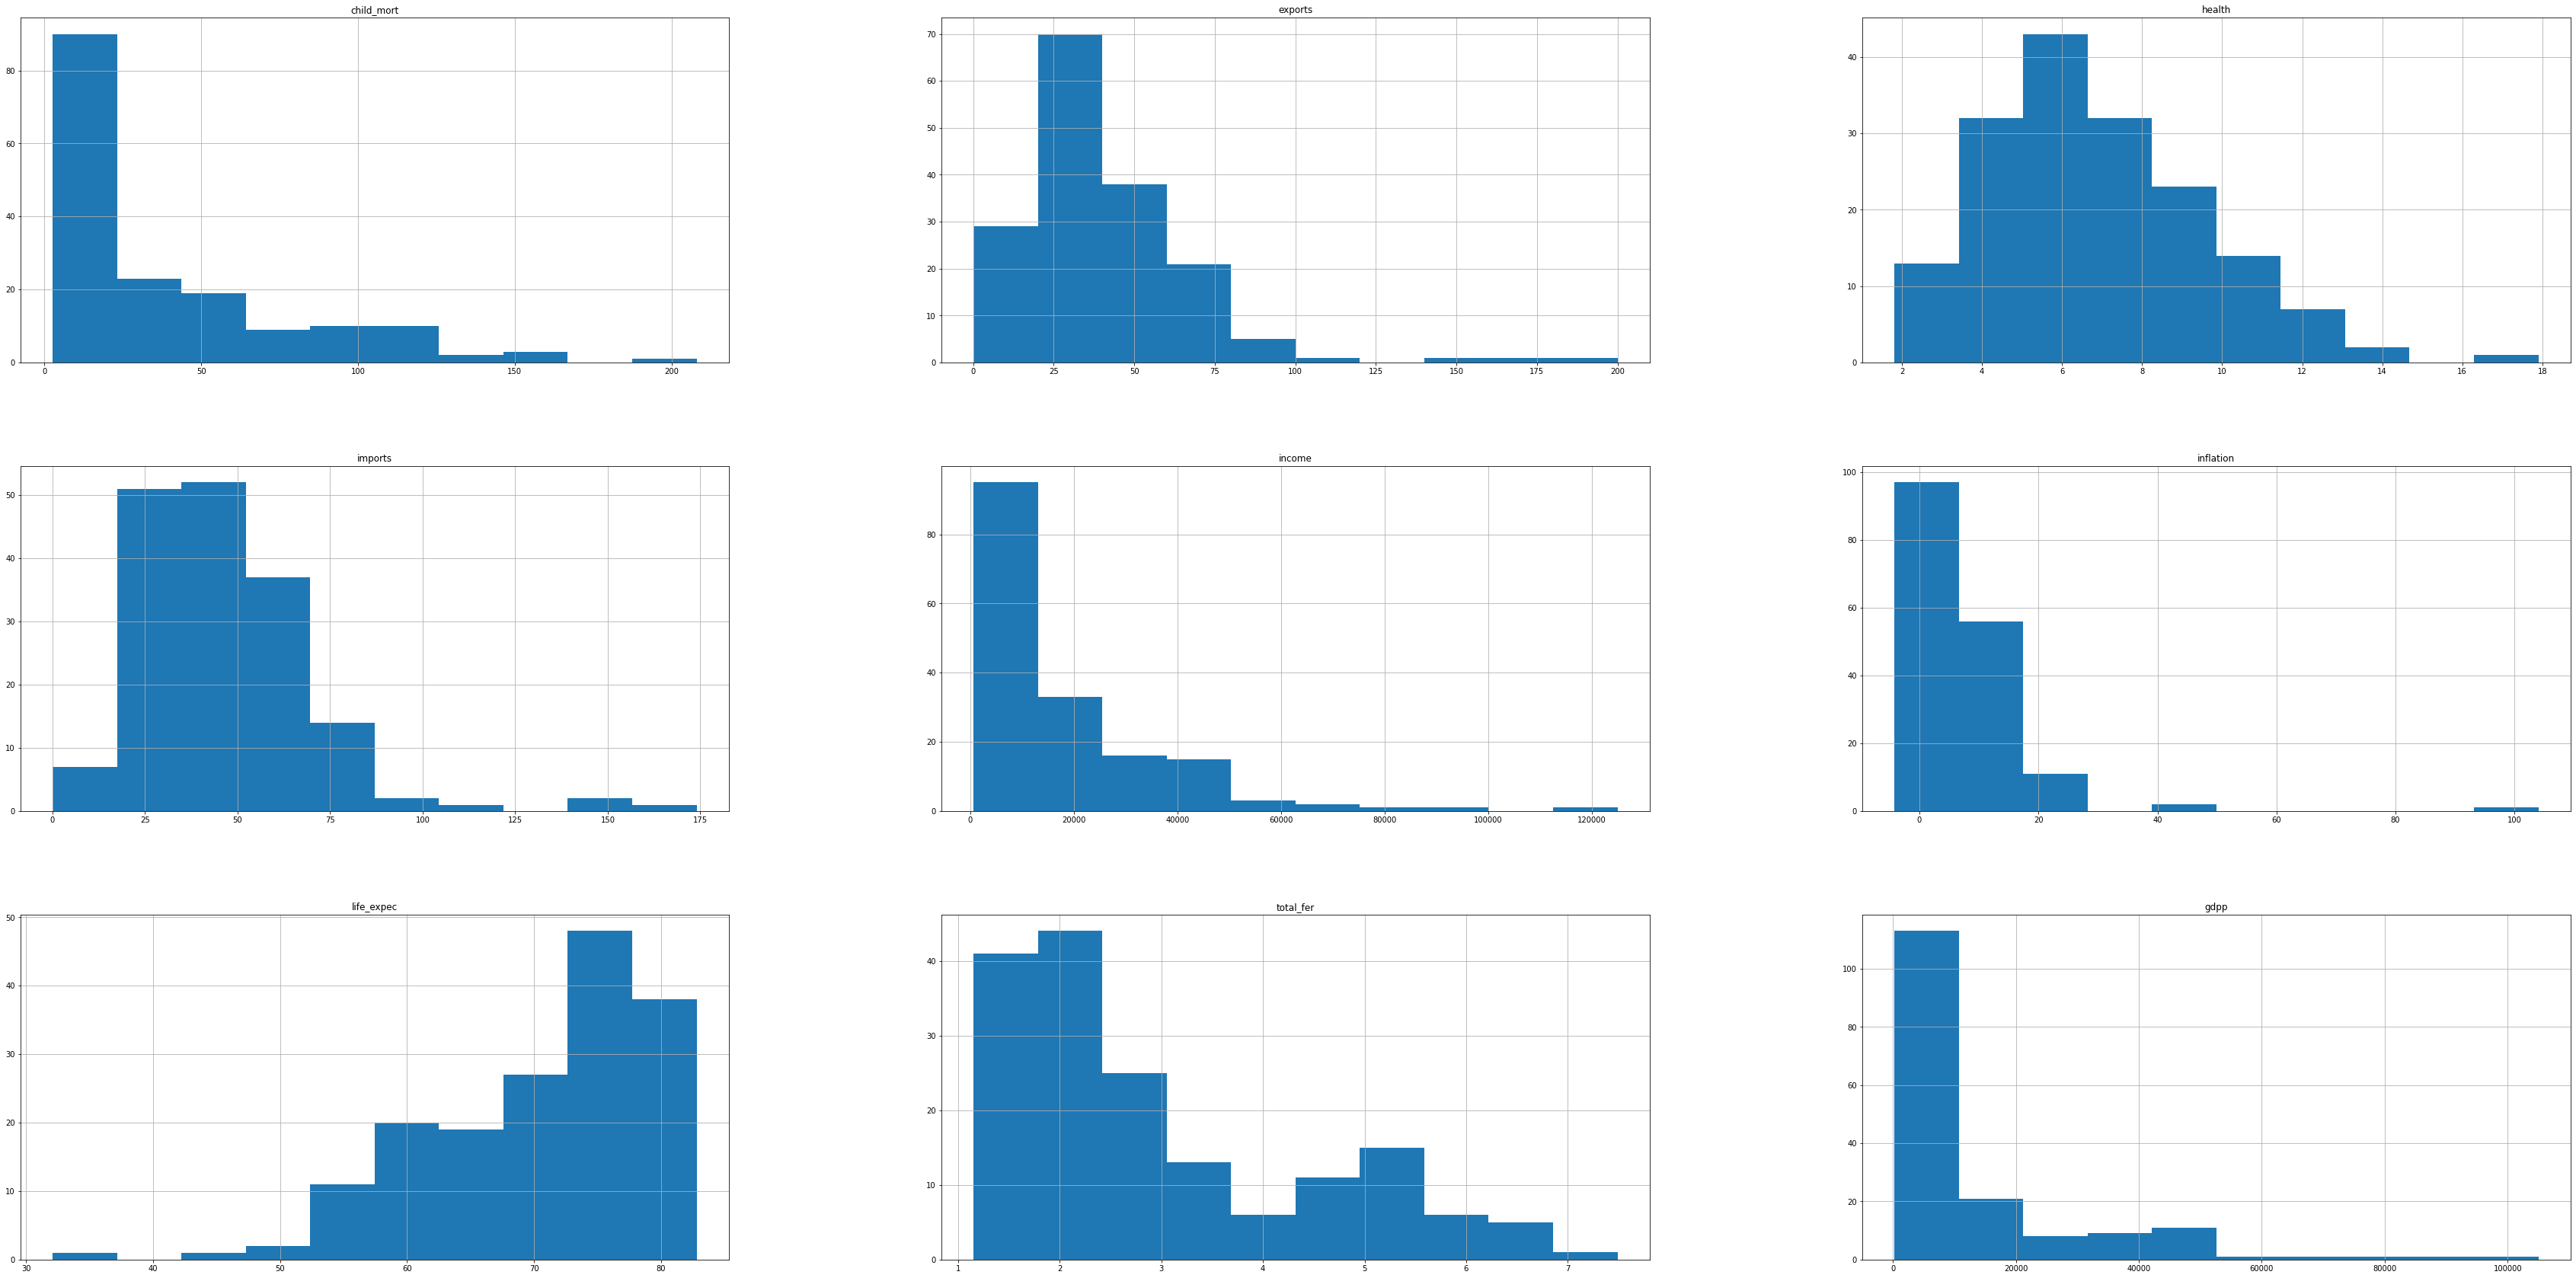

In [61]:
df.hist(figsize = (60,30))
plt.show()

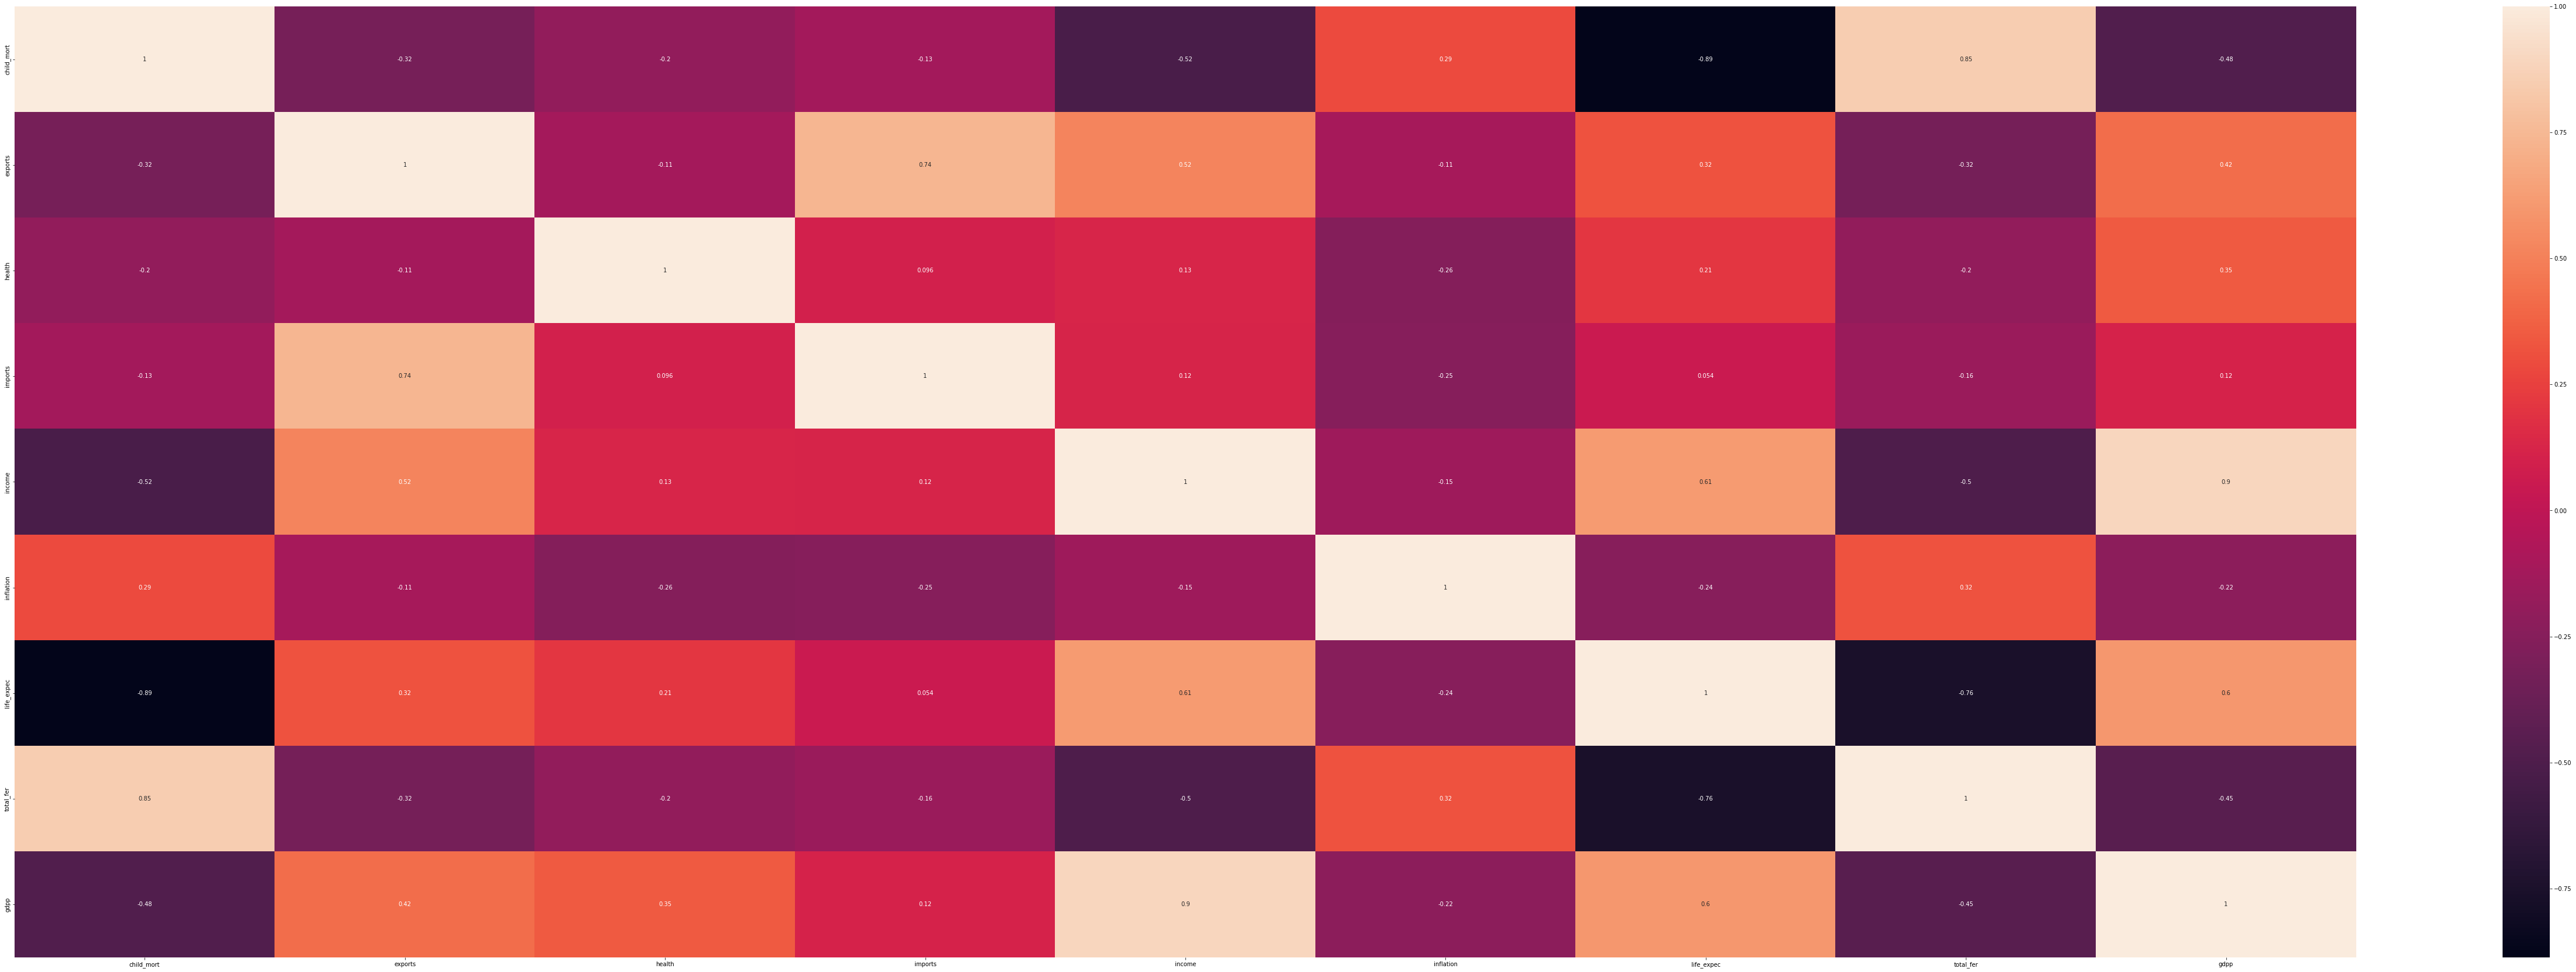

In [62]:
plt.figure(figsize = (90,30))
df_corr = df.corr()
sns.heatmap(df_corr,xticklabels=df_corr.columns,yticklabels=df_corr.columns,annot=True)


In [63]:
df_columns = df_corr.columns.tolist()
for i in range(len(df_columns)):
  correlation_columns = df_corr[f'{df_corr.columns[i]}']
  
  for j in range(len(df_columns)):
    correleation_row = correlation_columns[j]
    # if df_columns[i] == 'Spending_Score' or df_columns[j] == 'Spending_Score':
    if (correleation_row < 1 and correleation_row > 0.8) or (correleation_row > -1 and correleation_row < -0.5):
    # if (correleation_row < 0.1 and correleation_row > -0.1):
      print(df_columns[i],df_columns[j],correleation_row)

child_mort income -0.5243150164994345
child_mort life_expec -0.8866760973367771
child_mort total_fer 0.8484781105566707
income child_mort -0.5243150164994345
income total_fer -0.5018400532297548
income gdpp 0.895571433087531
life_expec child_mort -0.8866760973367771
life_expec total_fer -0.7608746874349646
total_fer child_mort 0.8484781105566707
total_fer income -0.5018400532297548
total_fer life_expec -0.7608746874349646
gdpp income 0.895571433087531


In [64]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


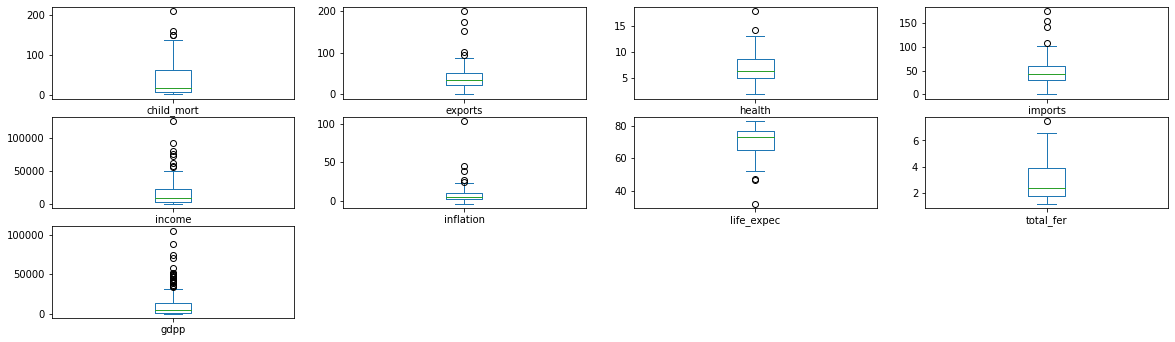

In [65]:
df.plot(kind='box', subplots=True, figsize=(20, 40),layout=(20,4))
plt.show()